In [19]:
# 安装必要的库
!pip install transformers
!pip install jieba
!pip install python-Levenshtein
!pip install seaborn matplotlib
!pip install scipy numpy
!pip install scikit-learn

In [20]:
from transformers import BertTokenizer, BertModel
import torch
from scipy.spatial.distance import cosine
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
from sklearn.preprocessing import normalize
import jieba
import Levenshtein as lev

In [21]:
# 在线下载并初始化BERT模型和分词器
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
model = BertModel.from_pretrained('bert-base-chinese')
model.eval()

# 示例翻译记忆库
translation_memory = [
    {"zh": "翻译记忆库帮助我们提高工作效率。", "en": "The translation memory helps us improve work efficiency."},
    {"zh": "使用计算机辅助翻译工具可以减少重复工作。",
     "en": "Using computer-assisted translation tools can reduce repetitive work."},
    {"zh": "机器翻译的质量不断提高。", "en": "The quality of machine translation is continuously improving."},
    {"zh": "人工翻译依然是不可或缺的。", "en": "Human translation is still indispensable."},
]

# 待译句子
待译句子 = "计算机辅助翻译工具可以减少重复"

In [22]:
# 获取BERT嵌入的函数
def get_sentence_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return normalize(embeddings.reshape(1, -1)).flatten()

# 计算待译句子与翻译记忆库的BERT相似度
def compute_similarity_to_memory(待译句子, translation_memory):
    待译嵌入 = get_sentence_embedding(待译句子)
    similarities = []
    for memory in translation_memory:
        memory_embedding = get_sentence_embedding(memory['zh'])
        similarity = 1 - cosine(待译嵌入, memory_embedding)
        similarities.append(similarity)
    return similarities

# 分词函数
def tokenize(sentence):
    return set(jieba.lcut(sentence))

# 计算Jaccard相似度
def jaccard_similarity(sentence1, sentence2):
    set1 = tokenize(sentence1)
    set2 = tokenize(sentence2)
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    similarity = len(intersection) / len(union)
    return similarity

# 计算待译句子与翻译记忆库的Jaccard相似度
def compute_jaccard_similarity_to_memory(待译句子, translation_memory):
    similarities = []
    for memory in translation_memory:
        similarity = jaccard_similarity(待译句子, memory['zh'])
        similarities.append(similarity)
    return similarities

# 计算包含度
def compute_containment_similarity(待译句子, translation_memory):
    similarities = []
    for memory in translation_memory:
        if 待译句子 in memory['zh']:
            match_ratio = len(待译句子) / len(memory['zh'])
            similarities.append(match_ratio)
        else:
            similarities.append(0)
    return similarities

# 计算莱文斯坦相似度
def levenshtein_similarity(sentence1, sentence2):
    distance = lev.distance(sentence1, sentence2)
    max_len = max(len(sentence1), len(sentence2))
    similarity = 1 - distance / max_len  # 归一化相似度
    return similarity

# 计算待译句子与翻译记忆库的莱文斯坦相似度
def compute_levenshtein_similarity_to_memory(待译句子, translation_memory):
    similarities = []
    for memory in translation_memory:
        similarity = levenshtein_similarity(待译句子, memory['zh'])
        similarities.append(similarity)
    return similarities

--2024-12-10 04:55:34--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 172.67.129.58, 104.21.1.127, 2606:4700:3031::ac43:813a, ...
Connecting to www.wfonts.com (www.wfonts.com)|172.67.129.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘simhei.ttf’

simhei.ttf          100%[===================>]   9.58M  23.9MB/s    in 0.4s    

2024-12-10 04:55:35 (23.9 MB/s) - ‘simhei.ttf’ saved [10050870/10050870]



<ipython-input-23-13f87b0b00e5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='句子', y='相似度', palette='coolwarm')


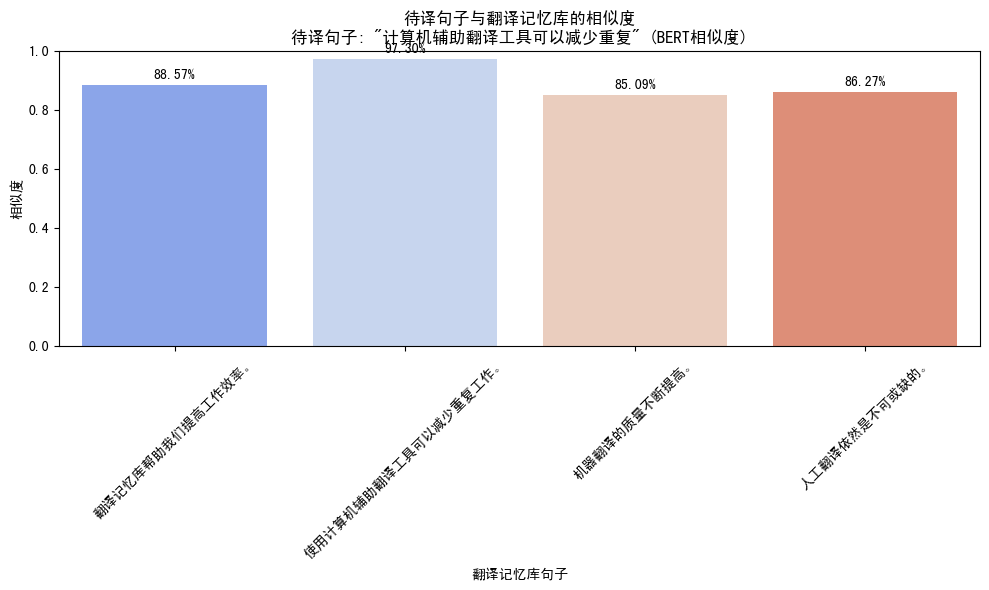

待译句子: "计算机辅助翻译工具可以减少重复"
最高匹配的翻译句子: "使用计算机辅助翻译工具可以减少重复工作。" (英文: "Using computer-assisted translation tools can reduce repetitive work.")
BERT相似度比值: 97.30%


<ipython-input-23-13f87b0b00e5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='句子', y='相似度', palette='coolwarm')


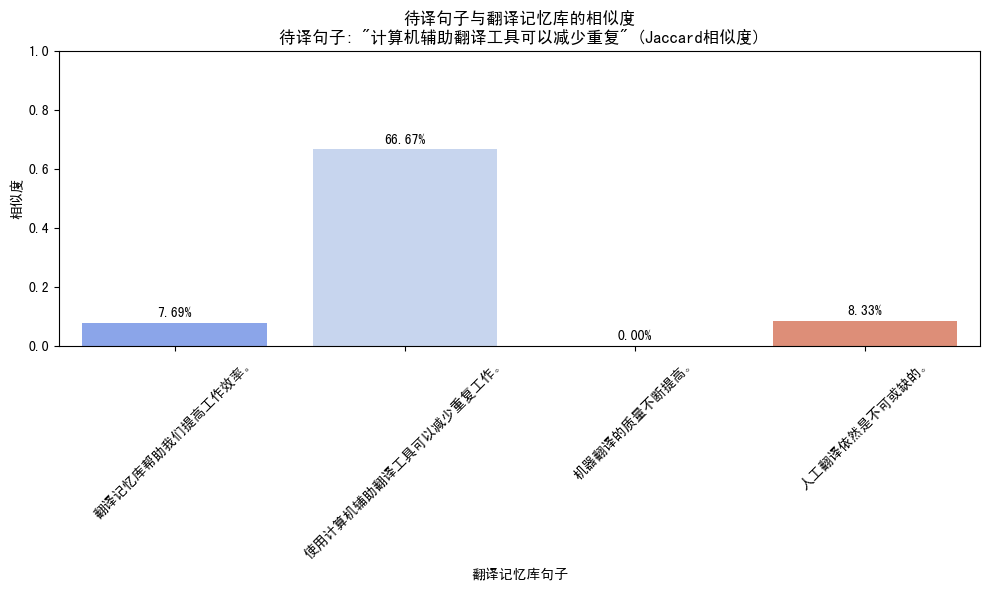

待译句子: "计算机辅助翻译工具可以减少重复"
最高匹配的翻译句子: "使用计算机辅助翻译工具可以减少重复工作。" (英文: "Using computer-assisted translation tools can reduce repetitive work.")
Jaccard相似度比值: 66.67%


<ipython-input-23-13f87b0b00e5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='句子', y='相似度', palette='coolwarm')


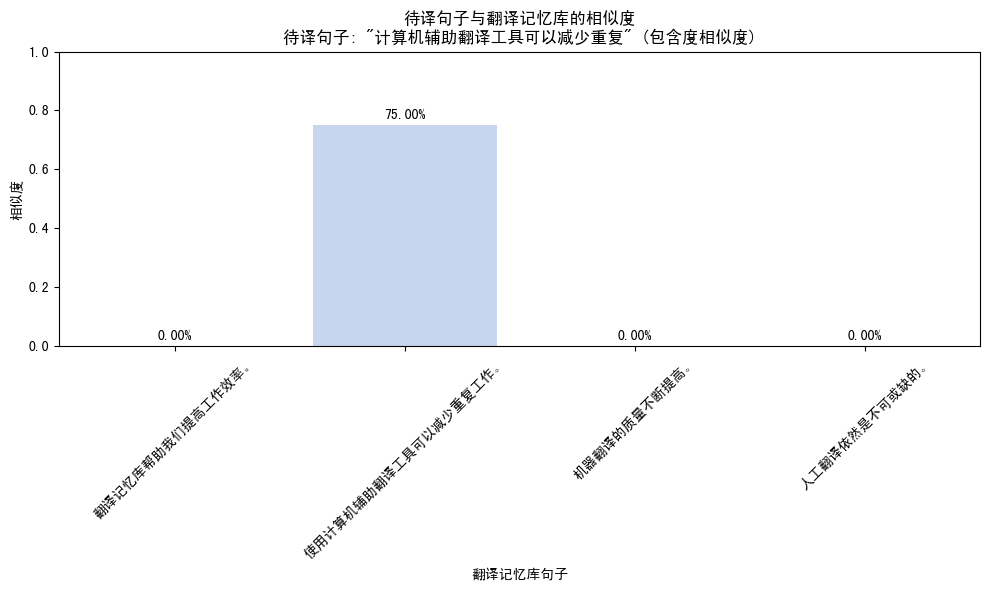

待译句子: "计算机辅助翻译工具可以减少重复"
最高匹配的翻译句子: "使用计算机辅助翻译工具可以减少重复工作。" (英文: "Using computer-assisted translation tools can reduce repetitive work.")
包含度相似度比值: 75.00%


<ipython-input-23-13f87b0b00e5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='句子', y='相似度', palette='coolwarm')


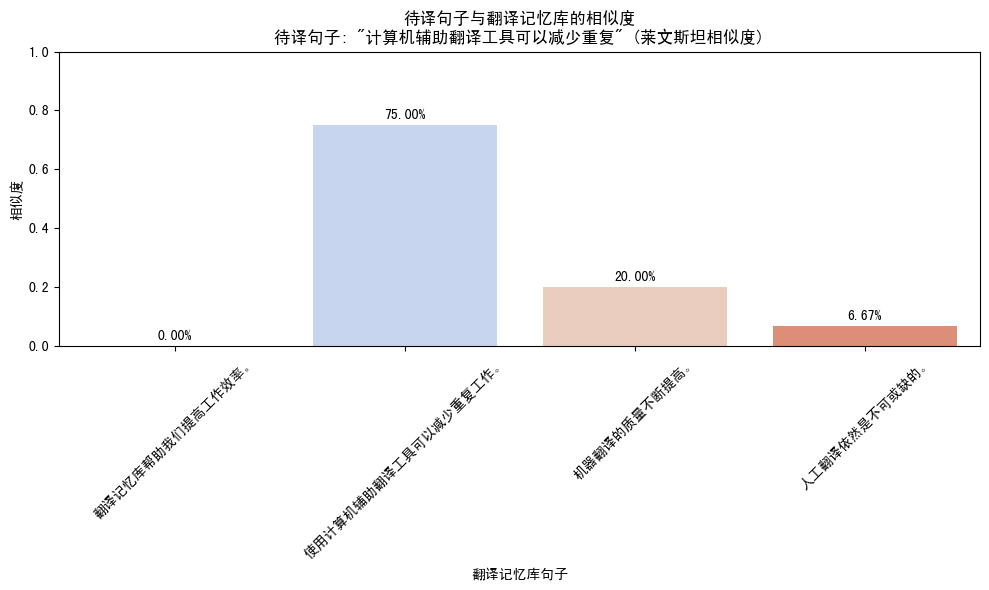

待译句子: "计算机辅助翻译工具可以减少重复"
最高匹配的翻译句子: "使用计算机辅助翻译工具可以减少重复工作。" (英文: "Using computer-assisted translation tools can reduce repetitive work.")
莱文斯坦相似度比值: 75.00%


In [23]:
# 可视化相似度并显示百分比
import matplotlib.pyplot as plt
from matplotlib import font_manager
import os
import seaborn as sns
import numpy as np

!wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
fontManager.addfont('simhei.ttf')
mpl.rc('font', family='SimHei')

def plot_similarity(similarities, translation_memory, 待译句子, title_suffix=""):
    plt.figure(figsize=(10, 6))
    data = {'句子': [memory['zh'] for memory in translation_memory], '相似度': similarities}
    sns.barplot(data=data, x='句子', y='相似度', palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title(f"待译句子与翻译记忆库的相似度\n待译句子: \"{待译句子}\" {title_suffix}")
    plt.xlabel("翻译记忆库句子")
    plt.ylabel("相似度")
    plt.ylim(0, 1)

    # 添加百分比数值
    for index, value in enumerate(similarities):
        plt.text(index, value + 0.02, f'{value:.2%}', ha='center')

    plt.tight_layout()
    plt.show()

# 计算BERT相似度并可视化
bert_similarities = compute_similarity_to_memory(待译句子, translation_memory)
plot_similarity(bert_similarities, translation_memory, 待译句子, title_suffix="(BERT相似度)")

# 找到最高匹配的翻译句子及其相似度
max_similarity_index = np.argmax(bert_similarities)
highest_match = translation_memory[max_similarity_index]
highest_similarity = bert_similarities[max_similarity_index]


# 打印原文和最高匹配的双语及其比值
print(f"待译句子: \"{待译句子}\"")
print(f"最高匹配的翻译句子: \"{highest_match['zh']}\" (英文: \"{highest_match['en']}\")")
print(f"BERT相似度比值: {highest_similarity:.2%}")

# 计算Jaccard相似度并可视化
jaccard_similarities = compute_jaccard_similarity_to_memory(待译句子, translation_memory)
plot_similarity(jaccard_similarities, translation_memory, 待译句子, title_suffix="(Jaccard相似度)")

# 找到最高匹配的翻译句子及其Jaccard相似度
max_jaccard_similarity_index = np.argmax(jaccard_similarities)
highest_jaccard_match = translation_memory[max_jaccard_similarity_index]
highest_jaccard_similarity = jaccard_similarities[max_jaccard_similarity_index]

# 打印原文和最高匹配的双语及其Jaccard相似度比值
print(f"待译句子: \"{待译句子}\"")
print(f"最高匹配的翻译句子: \"{highest_jaccard_match['zh']}\" (英文: \"{highest_jaccard_match['en']}\")")
print(f"Jaccard相似度比值: {highest_jaccard_similarity:.2%}")

# 计算包含度相似度并可视化
containment_similarities = compute_containment_similarity(待译句子, translation_memory)
plot_similarity(containment_similarities, translation_memory, 待译句子, title_suffix="(包含度相似度)")

# 找到最高匹配的翻译句子及其包含度比值
max_containment_similarity_index = np.argmax(containment_similarities)
highest_containment_match = translation_memory[max_containment_similarity_index]
highest_containment_similarity = containment_similarities[max_containment_similarity_index]

# 打印原文和最高匹配的双语及其包含度比值
print(f"待译句子: \"{待译句子}\"")
print(f"最高匹配的翻译句子: \"{highest_containment_match['zh']}\" (英文: \"{highest_containment_match['en']}\")")
print(f"包含度相似度比值: {highest_containment_similarity:.2%}")

# 计算莱文斯坦相似度并可视化
levenshtein_similarities = compute_levenshtein_similarity_to_memory(待译句子, translation_memory)
plot_similarity(levenshtein_similarities, translation_memory, 待译句子, title_suffix="(莱文斯坦相似度)")

# 找到最高匹配的翻译句子及其莱文斯坦相似度
max_levenshtein_similarity_index = np.argmax(levenshtein_similarities)
highest_levenshtein_match = translation_memory[max_levenshtein_similarity_index]
highest_levenshtein_similarity = levenshtein_similarities[max_levenshtein_similarity_index]

# 打印原文和最高匹配的双语及其莱文斯坦相似度比值
print(f"待译句子: \"{待译句子}\"")
print(f"最高匹配的翻译句子: \"{highest_levenshtein_match['zh']}\" (英文: \"{highest_levenshtein_match['en']}\")")
print(f"莱文斯坦相似度比值: {highest_levenshtein_similarity:.2%}")